# initilise the search space


In [1]:

import os
os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
#os.chdir('/rds/general/user/ma11115/home/STK_Search/STK_search')

from stk_search import Searched_space
import importlib
importlib.reload(Searched_space)
import pickle
import pymongo
import pandas as pd
import numpy as np
from stk_search.utils import database_utils


In [2]:
# load the data and the precursors dataset
importlib.reload(database_utils)
df_total_path = "data/output/Full_dataset/New_target200324.csv"
df_precursors_path ="data/output/Prescursor_data/precursor_data_200324.pkl"
df_total_new , df_precursors= database_utils.load_data_from_file(df_total_path, df_precursors_path)

C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\utils\database_utils.py:109: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


In [3]:
df_precursors

,InChIKey,Atom_num,HOMO (eV),LUMO (eV),HOMO_LUMO_GAP (eV),IP (eV),EA (eV),total energy (eV) vipea,First excited state Energy (eV),First excited osc,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,check
1,KYORXLIHDAZXPK-UHFFFAOYSA-N,25,-11.5745,-10.1316,1.442883,7.1531,3.8935,-1699.611759,"[2.97, 3.437, 3.827, 3.901, 4.181]","[0.1323, 0.3332, 0.001, 0.4911, 0.5211]",...,2.431497,4.086913,-1.275082,4.235050,3.229195,10.239962,-1.281141,-0.561829,1.909060,1
2,AMGZARGPNNDZNG-UHFFFAOYSA-N,19,-10.8198,-7.4250,3.394780,6.6286,1.7879,-983.099113,"[4.907, 4.965, 5.214, 5.323, 5.41]","[0.0069, 0.0014, 0.2465, 0.0252, 0.2375]",...,4.087585,-4.721875,2.090143,0.393100,-5.790439,3.491040,-5.810876,0.329550,2.277811,1
3,UVCFYBOLMFIWGF-FPYGCLRLSA-N,22,-11.6536,-9.8300,1.823610,7.5190,4.1701,-1426.075709,"[3.543, 3.828, 3.987, 4.107, 4.23]","[0.0026, 0.1704, 0.206, 0.2256, 0.0395]",...,11.093938,-12.801701,1.249414,1.977474,-5.581580,-7.595311,-1.056798,3.484916,0.540030,1
4,PQZAHLJJGPAGBD-OQFOIZHKSA-N,22,-11.5774,-9.8714,1.706007,7.5324,4.1806,-1426.205720,"[3.779, 3.813, 4.035, 4.115, 4.429]","[0.0002, 0.0277, 0.1648, 0.3408, 0.0013]",...,28.383257,-2.877582,0.077995,11.964630,-0.280776,-13.771971,-0.404846,8.579813,1.014201,1
5,HFUBKQHDPJZQIW-UHFFFAOYSA-N,13,-11.6185,-9.5986,2.019861,7.7105,3.7821,-1085.337355,"[4.436, 4.438, 5.127, 5.751, 5.826]","[0.2419, 0.2902, 0.0, 0.0, 0.0098]",...,-15.996156,-3.355998,-22.622424,10.287109,9.483473,-1.245406,0.124287,2.916314,1.085874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,MRBCQJMEGDDUNN-WMZJFQQLSA-N,26,-11.3354,-9.5452,1.790262,7.1329,3.9026,-1507.998669,"[3.469, 3.535, 3.734, 4.091, 4.472]","[0.1294, 0.3115, 0.0009, 0.3734, 0.278]",...,-6.247267,6.524424,-10.108623,2.829739,-0.388156,-1.594496,-6.981106,4.310654,3.751575,1
308,ITWOUVVCPPUABP-WCIBSUBMSA-N,28,-11.6429,-9.6229,2.020001,7.4355,3.9957,-1677.172739,"[3.597, 3.703, 3.833, 4.106, 4.427]","[0.0143, 0.0607, 0.3665, 0.28, 0.1855]",...,-1.702751,-18.706489,-1.445009,-13.390773,-5.805965,0.138921,0.758164,0.435826,-1.080929,1
309,BNVUEFDNDBLDLM-UHFFFAOYSA-N,22,-11.1367,-8.9866,2.150111,6.9908,3.2628,-1182.108982,"[2.915, 3.557, 3.885, 4.242, 5.184]","[0.0108, 0.0, 0.1024, 0.0145, 0.234]",...,38.045181,13.914433,-10.899139,-2.321808,13.426422,-0.815701,1.752950,1.735148,-0.137714,1
310,BBVSASGXSWONDF-UHFFFAOYSA-N,28,-11.0931,-9.5040,1.589045,7.0133,3.9076,-1571.807452,"[3.035, 3.298, 3.489, 3.91, 4.062]","[0.036, 0.0221, 0.085, 0.2768, 0.2517]",...,-8.907419,13.611905,-2.188628,3.119942,-9.041528,-3.880149,-0.047984,-1.212186,-2.441073,1


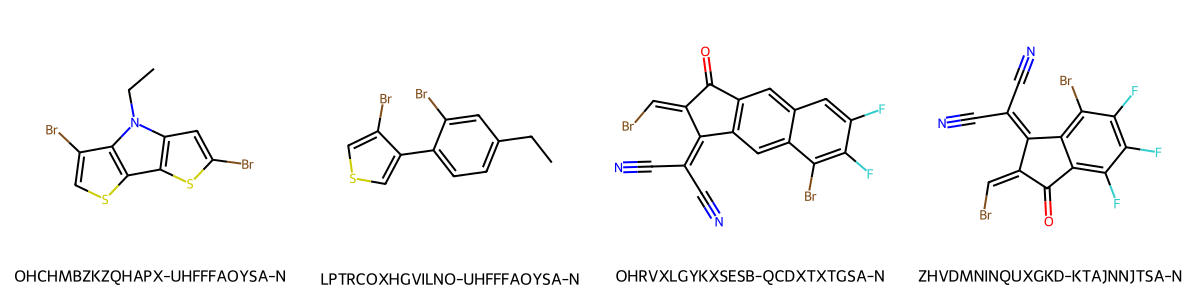

In [4]:
# plot some example of precursors
from rdkit.Chem import Draw
from rdkit import Chem
mol_list = []
mol_label = []
df_to_plot = df_precursors.sample(4)
df_to_plot['mol_opt_smiles'] = df_to_plot['mol_opt_2'].apply(lambda x : Chem.MolFromSmiles(Chem.MolToSmiles(x)))
mol_list.extend(df_to_plot['mol_opt_smiles'].values)
mol_label.extend(df_to_plot['InChIKey'].values)
# Draw molecules
img = Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(300, 300),legends=[f"{label}" for label in mol_label])  # adjust molsPerRow and subImgSize as needed
img

In [5]:
#%%  generate the search space

number_of_fragments = 6
target_name = 'target' # specify the target name ( here target refers to the combined property)
aim = 0.0 # specify the target value

SP = Searched_space.Searched_Space(number_of_fragments=number_of_fragments,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
print(SP.features_frag)
SP.generate_interactive_condition_V2(df_total=df_total_new)

Index(['InChIKey'], dtype='object')


In [6]:
import glob
#%% 

search_spaces_dfs = glob.glob('data/*pkl')
for id,df_path_SP in enumerate(search_spaces_dfs):
    print(id,df_path_SP)


0 data\search_space_properties_2023_09_11_12_03_15.pkl
1 data\search_space_properties_2023_09_21_16_41_29.pkl
2 data\search_space_properties_2023_09_22_09_04_06.pkl
3 data\search_space_properties_2023_10_30_11_19_54.pkl
4 data\search_space_properties_2023_10_30_15_51_43.pkl
5 data\search_space_properties_2023_10_30_15_52_38.pkl
6 data\search_space_properties_2023_10_30_15_54_12.pkl
7 data\search_space_properties_2023_10_30_15_54_29.pkl
8 data\search_space_properties_2023_10_30_16_15_58.pkl
9 data\search_space_properties_2023_10_30_16_20_54.pkl
10 data\search_space_properties_2024_05_07_11_27_14.pkl
11 data\search_space_properties_2024_05_08_14_43_36.pkl
12 data\search_space_properties_2024_05_09_16_28_25.pkl


In [7]:
df_SP = pd.read_pickle(search_spaces_dfs[12])
df_SP

,number of elements,syntax,conditions,Elements in top 5%,number of elements evaluated
0,820972403643456,"[0, 1, 2, 3, 4, 5]","[[], [], [], [], [], []]",0,0
1,93636,"(0, 0, 0, 0, 4, 0)","[[], [], [], [], [], []]",19.047619047619047,2.10e+01


In [8]:
# load the saved dataframe with all the tested conditions
# and output it in order to select a few to add to the bactk experiment

import pickle
from datetime import datetime
import os

def save_SP_for_EXP(df:pd.DataFrame,index_list:list,exp_name:str,number_of_fragments):
    time_now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    save_dir = f'data/input/EXP_search_space/{exp_name}_{time_now}/'
    os.makedirs(save_dir,exist_ok=True)
    SP = Searched_space.Searched_Space(number_of_fragments=number_of_fragments,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
    SP.features_frag=SP.features_frag.append(df_precursors.columns[17:23])
    SP.features_frag=SP.features_frag.append(df_precursors.columns[1:7])

    for id in index_list:
        SP.conditions_list = df['conditions'].values[id]
        SP.syntax = list(df['syntax'].values[id])[:number_of_fragments]
        #SP.redefine_search_space()
        print(SP.space_size)
        print(SP.syntax)
        print(SP.conditions_list)
        pickle.dump(SP,file=open(save_dir+f'/search_space_{id}.pkl','wb'))
    return SP, save_dir
experiment_name = '6_frag_all'
SP,save_dir= save_SP_for_EXP(df_SP,[0,2],experiment_name,number_of_fragments)

820972403643456
[0, 1, 2, 3, 4, 5]
[[], [], [], [], [], []]


IndexError: index 2 is out of bounds for axis 0 with size 2